## 1.0 Creating a Bar Chart Using Seaborn

In [2]:
#@title Default title text
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline # Allows plots to be rendered directly nside the notebook

In [3]:
# Load the dataset
df = pd.read_csv('pokemon.csv')
print(df.shape)
df.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
# check the naming convention of the column names
df.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

**Obdervation**
>There's inconsitency in the columns naming convention. The hyphens on special attack and special defense will be replaced with underscores.

In [32]:
# Rename the two columns above
df.rename(columns = {'special-attack': 'special_attack',
                     'special-defense': 'special_defense'}, inplace=True)
# Confirm if the changes have been effected by previewing the column names
df.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special_attack', 'special_defense'],
      dtype='object')

Before plotting any graphs, it's advised to check if the data types are in the correct format first. If they aren't then change them to the correct format. Use the pandas info() or the dtypes method. 

In [6]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


**Observation**
>From the above output, the datatypes are in the correct format. We can therefore proceed with the plotting of the graphs.

### Plotting a Bar Chart for the Generation Id Using Seaborn

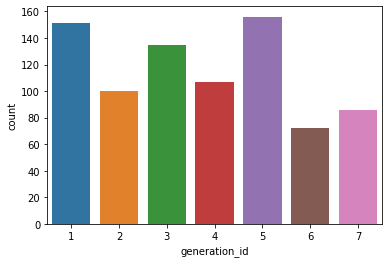

In [7]:
# Use countplot to create a bar chart for the generation id
sb.countplot(data=df, x='generation_id');

**Observation**
>From the above graph, the colors don't have any meaning. The generation are already associated woth different numbers on the x-axis and we do not have a reason to differentiate them with different colors. Therefore, we'll change it to one color using seaborn color palette function.

In [8]:
# Use seaborn color palette to ontain one color value
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

**I'll pick the first color and store it in base_color variable.**

In [9]:
base_color = sb.color_palette()[0]
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

**Next, I'll add the variable in the countplot function in order to have one color.**

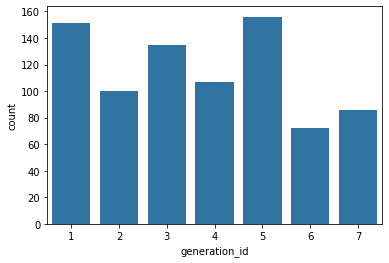

In [15]:
# Use countplot to create a bar chart for the generation id
# Use base color variable to change the color into one
sb.countplot(data=df, x='generation_id',color=base_color);

To improve on the above plot, we'll consider ordering the generation id's from highest to lowest. Using the matplotlib value_counts() will come in handy. This is because the value_counts() returns the unique values in a column in descending order then we'll use index to map the order of the generation id on the graph.

In [16]:
# Use value count to get the descinding order of generation id
order_generation = df['generation_id'].value_counts()
order_generation

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [18]:
# Get the index of the generation ids in descing order
order_gen_idx = df['generation_id'].value_counts().index
order_gen_idx

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

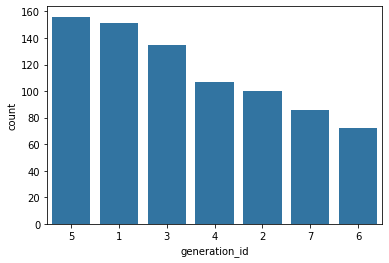

In [19]:
# Use the index above to sort the bars from highest to lowest
sb.countplot(data=df, x='generation_id',color=base_color, order = order_gen_idx);

In [22]:
# Get the index for the type_1 values in desceinding order
type_ = df['type_1'].value_counts().index
type_

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

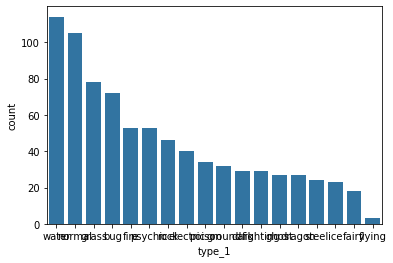

In [23]:
# Plot a bar chart for type_1
sb.countplot(data=df, x='type_1',color=base_color, order = type_);

From the above plot, the lables have overlapped. This shouldn't be the case for a good visualization. To rectify this, we'll use the matplotlib xtics to rotate the values on the x-axis to 90 degrees by setting rotation = 90 degrees.

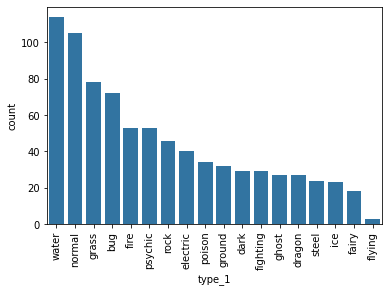

In [25]:
# Plot a bar chart for type_1
sb.countplot(data=df, x='type_1',color=base_color, order = type_)
plt.xticks(rotation=90);

The other alternative is to set the barchart into a horizontal chart by changing the x parameter to y parameter as shown below:

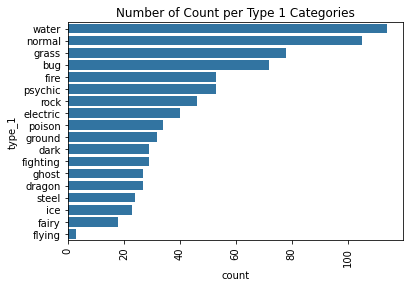

In [38]:
# Plot a bar chart for type_1
sb.countplot(data=df, y='type_1',color=base_color, order = type_).set(
    title = 'Number of Count per Type 1 Categories')
plt.xticks(rotation=90);

## 2. Creating bar Chart Using Matplotlib

The other way one can even create a similar bar chart is using the Matplotlib, instead of Seaborn. We will use the matplotlib.pyplot.bar() function to plot the chart. The syntax is:
```
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None).``` In the example below, we will use Series.value_counts() to extract a Series from the given DataFrame object.

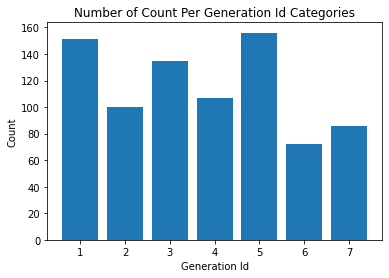

In [39]:
# Return the Series having unique values
x = df['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = df['generation_id'].value_counts(sort=False)

# Use the matplotlib bar() to plot the bar chart
plt.bar(x, y)

# Labeling the axes
plt.xlabel('Generation Id')
plt.ylabel('Count')

# Title
plt.title('Number of Count Per Generation Id Categories')

# Dsiplay the plot
plt.show()

To have the bar chart display the values from highest to lowest, set the sort parameter to true as shown below:

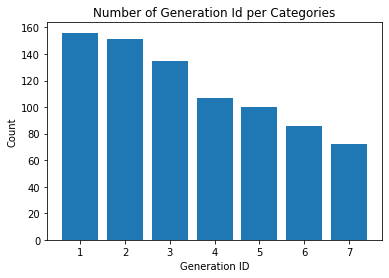

In [35]:
# Return the Series having unique values
x = df['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = df['generation_id'].value_counts(sort=True)

# Use the matplotlib bar() to plot the bar chart
plt.bar(x, y)

# Labeling the axes
plt.xlabel('Generation ID')
plt.ylabel('Count')

# Graph Title
plt.title('Number of Generation Id per Categories')

# Dsiplay the plot
plt.show()

**Note**
>While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. For ordinal-type data, we probably want to sort the bars in order of the variables. The best thing for us to do in this case is to convert the column into an ordered categorical data type.

**Additional Variation**
>Refer to the CategoricalDtype to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.